In [1]:
##Q1}

In [1]:
## import the libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
## load the dataset
ds=pd.read_csv(r"C:\Amit Dubli\ExcelR\ExcelR assignments & material\Data Science\01 Assignments\04 Simple Linear Regression\delivery_time.csv")

In [3]:
ds

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
ds=ds.rename(columns={'Delivery Time': 'dt','Sorting Time': 'st' })

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   dt      21 non-null     float64
 1   st      21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
ds.describe()

,dt,st
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [7]:
ds.isnull().sum()

dt    0
st    0
dtype: int64

In [8]:
ds[ds.duplicated()].shape

(0, 2)

In [9]:
ds[ds.duplicated()]

,dt,st


In [10]:
print(ds)

       dt  st
0   21.00  10
1   13.50   4
2   19.75   6
3   24.00   9
4   29.00  10
5   15.35   6
6   19.00   7
7    9.50   3
8   17.90  10
9   18.75   9
10  19.83   8
11  10.75   4
12  16.68   7
13  11.50   3
14  12.03   3
15  14.88   4
16  13.75   6
17  18.11   7
18   8.00   2
19  17.83   7
20  21.50   5


In [11]:
ds.corr()

,dt,st
dt,1.000000,0.825997
st,0.825997,1.000000


Text(0, 0.5, 'Delivery time')

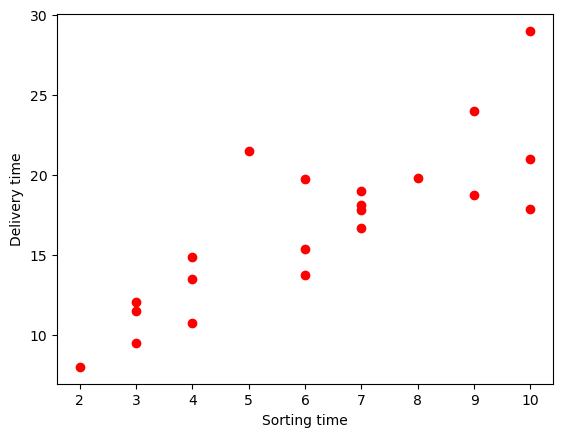

In [12]:
plt.scatter(x=ds.st, y=ds.dt, color='red')
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")

{'whiskers': [<matplotlib.lines.Line2D at 0x1d77a8ce3d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d77a8ce970>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d77a8ce100>],
 'medians': [<matplotlib.lines.Line2D at 0x1d77a8cef10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d77a8de220>],
 'means': []}

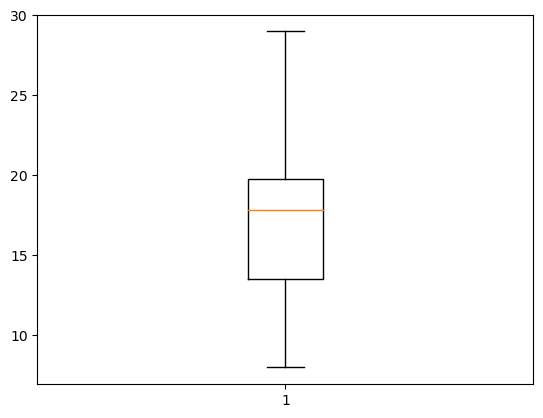

In [13]:
plt.boxplot(ds.dt)

(array([5., 4., 8., 3., 1.]),
 array([ 8. , 12.2, 16.4, 20.6, 24.8, 29. ]),
 <BarContainer object of 5 artists>)

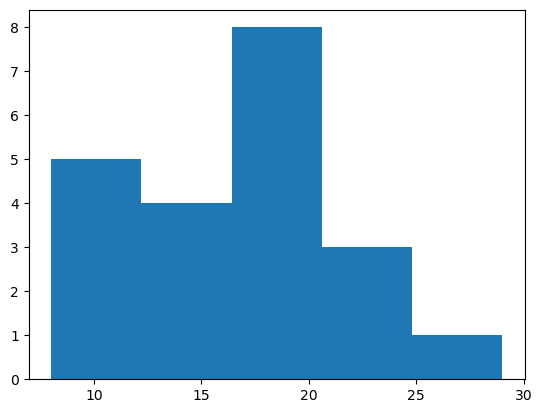

In [14]:
plt.hist(ds.dt, bins=5)

<AxesSubplot:xlabel='dt', ylabel='st'>

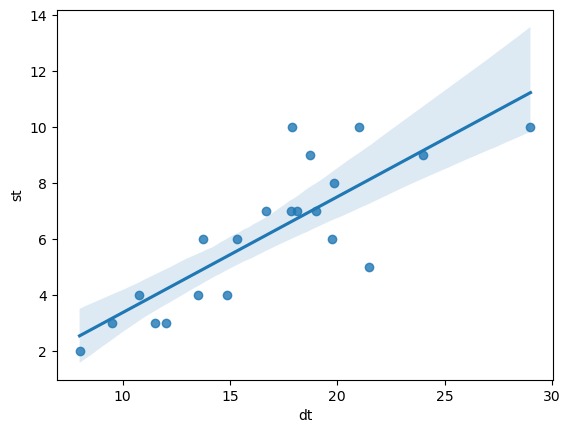

In [15]:
sns.regplot(x=ds['dt'],y=ds['st'])

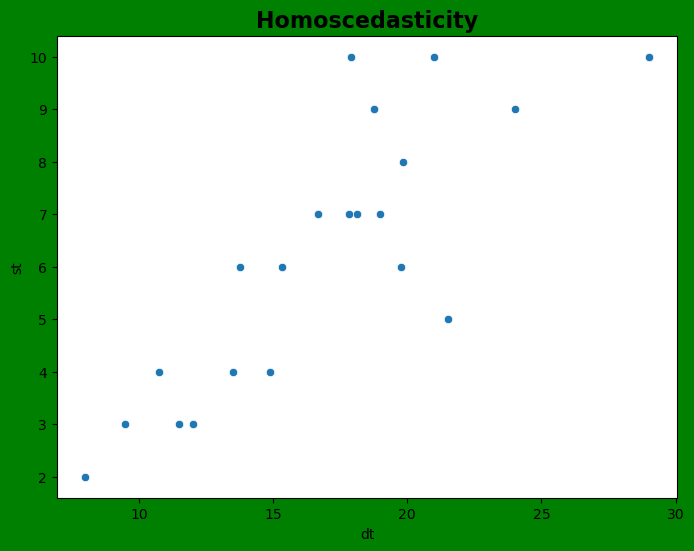

In [16]:
plt.figure(figsize = (8,6), facecolor = 'green')
sns.scatterplot(x = ds['dt'], y = ds['st'])
plt.title('Homoscedasticity', fontweight = 'bold', fontsize = 16)
plt.show()

In [17]:
ds.var()

dt    25.754619
st     6.461905
dtype: float64

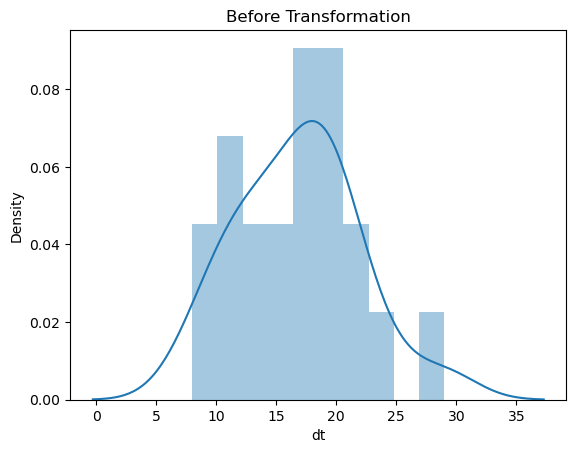

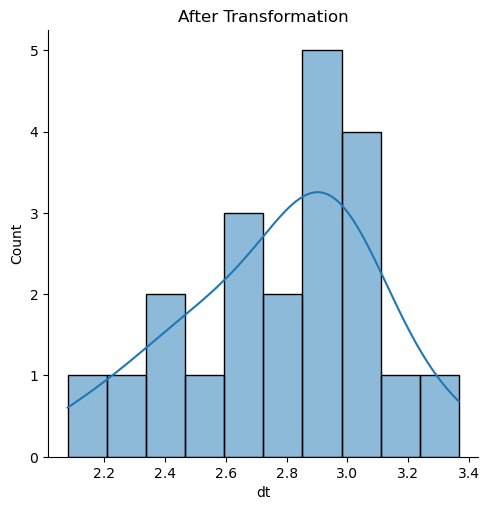

In [18]:
sns.distplot(ds['dt'], bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(ds['dt']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

In [77]:
from statsmodels.graphics.gofplots import qqplot

In [78]:
smf.qqplot(np.log(ds['dt']), line = 'r')
plt.title('No transformation')
smf.qqplot(np.sqrt(ds['dt']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(ds['dt']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(ds['dt']), line = 'r')
plt.title('Cube root transformation')
plt.show()

KeyError: 'dt'

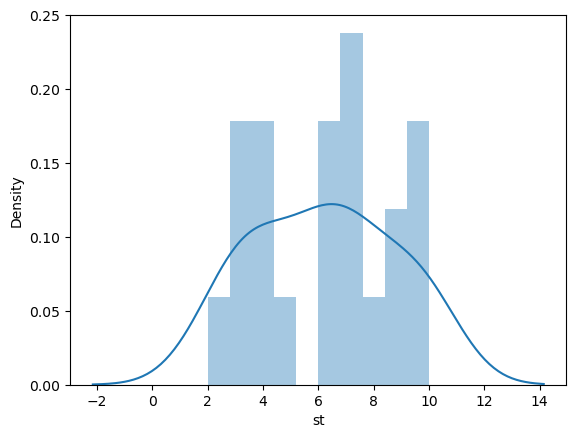

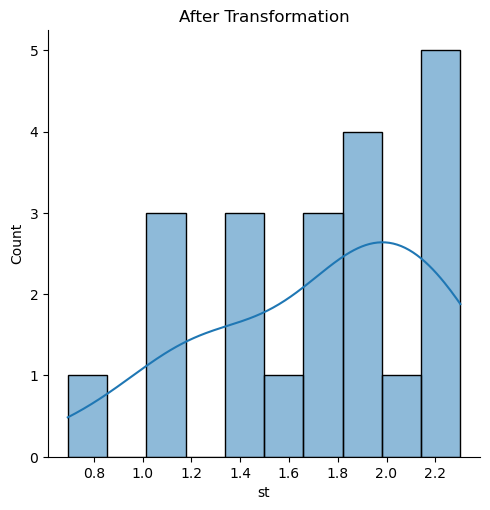

In [20]:
labels = ['Before Transformation','After Transformation']
sns.distplot(ds['st'], bins = 10, kde = True)
sns.displot(np.log(ds['st']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

In [21]:
smf.qqplot(ds['st'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(ds['st']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(ds['st']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(ds['st']), line = 'r')
plt.title('Cube root transformation')
plt.show()

AttributeError: module 'statsmodels.formula.api' has no attribute 'qqplot'

In [22]:
model=smf.ols('dt~st',data=ds).fit()

In [23]:
model.params

Intercept    6.582734
st           1.649020
dtype: float64

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 14 Jun 2023   Prob (F-statistic):           3.98e-06
Time:                        01:06:23   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
st             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
model1=smf.ols('dt~np.log(st)',data=ds).fit()

In [26]:
model1.params

Intercept     1.159684
np.log(st)    9.043413
dtype: float64

In [27]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Wed, 14 Jun 2023   Prob (F-statistic):           2.64e-06
Time:                        01:06:32   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(st)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
model2 = smf.ols('np.cbrt(st)~np.cbrt(dt)', data = ds).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.cbrt(st)   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     55.25
Date:                Wed, 14 Jun 2023   Prob (F-statistic):           4.90e-07
Time:                        01:06:34   Log-Likelihood:                 12.617
No. Observations:                  21   AIC:                            -21.23
Df Residuals:                      19   BIC:                            -19.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.4315      0.302     -1.431      0.169      -1.063       0.200
np.cbrt(dt)     0.8800      0.118      7.433      0.000       0.632       1.128
==============================================================================
Omnibus:                        0.245   Durbin-Watson:                   1.356
Prob(Omnibus):                  0.885   Jarque-Bera (JB):                0.031
Skew:                          -0.078   Prob(JB):                        0.985
Kurtosis:                       2.894   Cond. No.                         29.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
model3 = smf.ols('np.log(st)~np.log(dt)', data = ds).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(st)   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Wed, 14 Jun 2023   Prob (F-statistic):           1.60e-07
Time:                        01:06:37   Log-Likelihood:                 2.1913
No. Observations:                  21   AIC:                           -0.3826
Df Residuals:                      19   BIC:                             1.706
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8573      0.450     -4.131      0.001      -2.798      -0.916
np.log(dt)     1.2923      0.161      8.024      0.000       0.955       1.629
==============================================================================
Omnibus:                        0.197   Durbin-Watson:                   1.365
Prob(Omnibus):                  0.906   Jarque-Bera (JB):                0.258
Skew:                          -0.192   Prob(JB):                        0.879
Kurtosis:                       2.617   Cond. No.                         28.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
print(model.tvalues,'\n',model.pvalues)

Intercept    3.823349
st           6.387447
dtype: float64 
 Intercept    0.001147
st           0.000004
dtype: float64


In [31]:
model.rsquared,model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

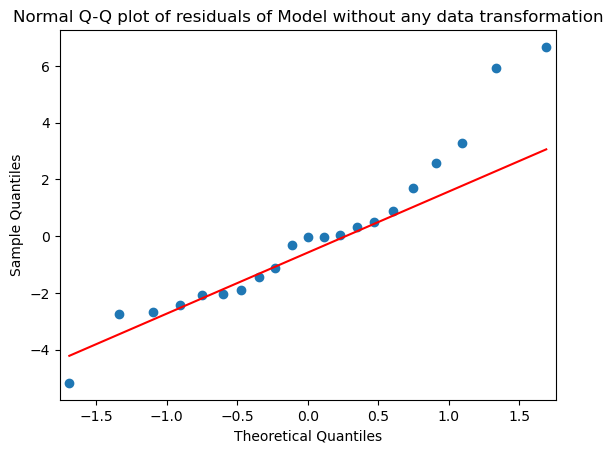

In [32]:
sm.qqplot(model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model without any data transformation')
plt.show()

In [33]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

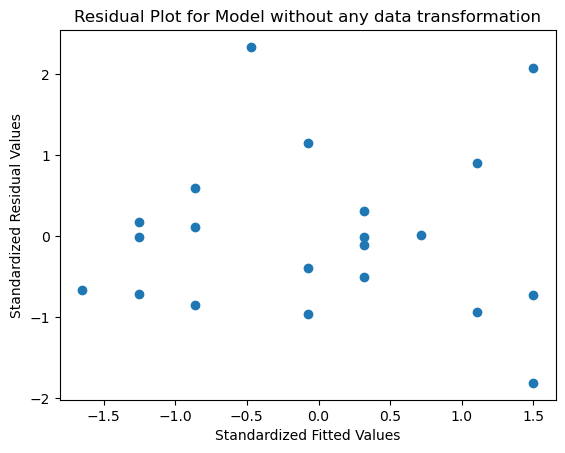

In [34]:
plt.scatter(get_standardized_values(model.fittedvalues), get_standardized_values(model.resid))
plt.title('Residual Plot for Model without any data transformation')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

In [35]:
from sklearn.metrics import mean_squared_error

In [36]:
pred = model.predict(ds)

In [37]:
pred1 = model1.predict(ds)

In [38]:
pred2 = model2.predict(ds)

In [39]:
new_data=pd.Series([3,5])
new_data

0    3
1    5
dtype: int64

In [40]:
data_pred=pd.DataFrame(new_data,columns=['dt'])
data_pred=pd.DataFrame(new_data,columns=['st'])
data_pred

,st
0,3
1,5


In [41]:
model.predict(data_pred)


0    11.529794
1    14.827833
dtype: float64

In [42]:
##Q2}

In [43]:

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
import statsmodels.formula.api as sm
import warnings
warnings.filterwarnings('ignore')

In [44]:
ds=pd.read_csv(r"C:\Amit Dubli\ExcelR\ExcelR assignments & material\Data Science\01 Assignments\04 Simple Linear Regression\Salary_Data.csv")
ds

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [45]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [46]:
ds.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [47]:
ds.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [48]:
ds[ds.duplicated()].shape

(0, 2)

In [49]:
ds[ds.duplicated()]

,YearsExperience,Salary


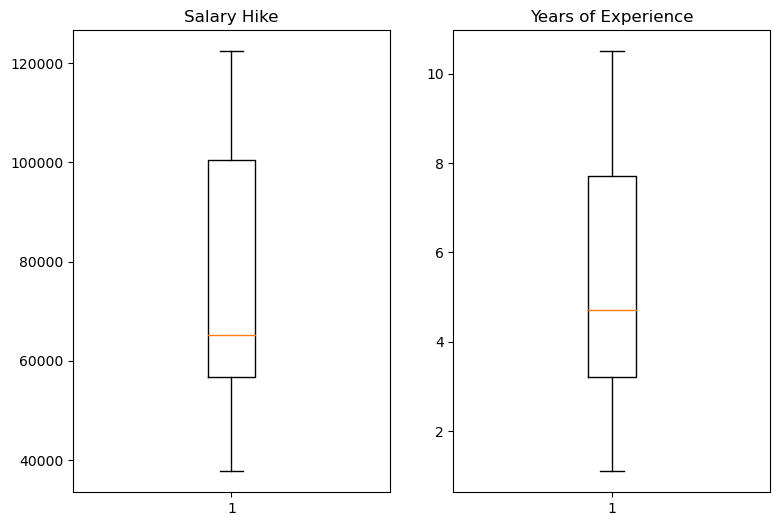

In [50]:
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.boxplot(ds['Salary'])
plt.title('Salary Hike')
plt.subplot(122)
plt.boxplot(ds['YearsExperience'])
plt.title('Years of Experience')
plt.show()

In [51]:
ds.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

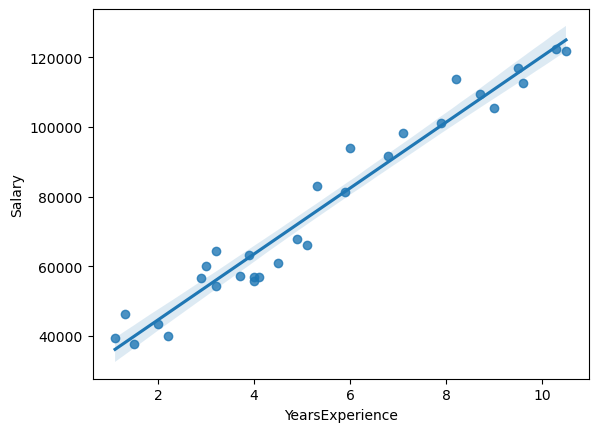

In [52]:
sns.regplot(x=ds['YearsExperience'],y=ds['Salary'])

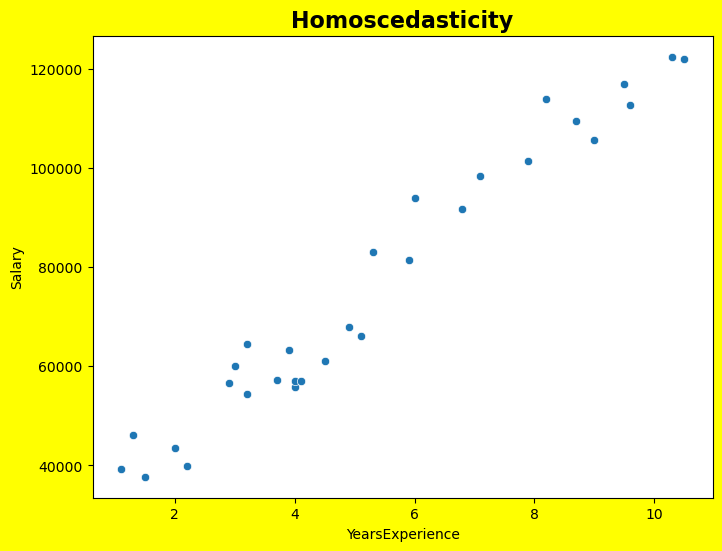

In [53]:
plt.figure(figsize = (8,6), facecolor = 'yellow')
sns.scatterplot(x = ds['YearsExperience'], y = ds['Salary'])
plt.title('Homoscedasticity', fontweight = 'bold', fontsize = 16)
plt.show()

In [54]:
ds.var()

YearsExperience    8.053609e+00
Salary             7.515510e+08
dtype: float64

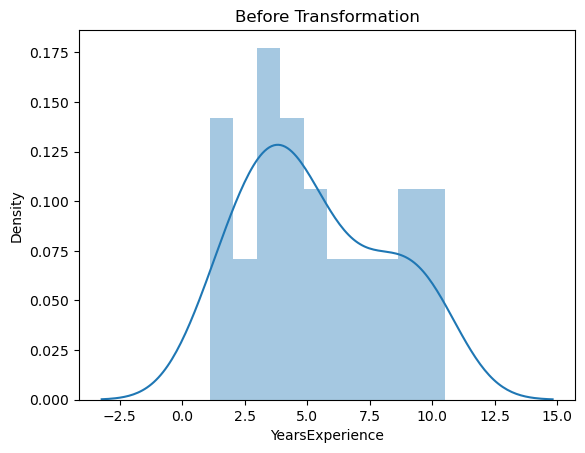

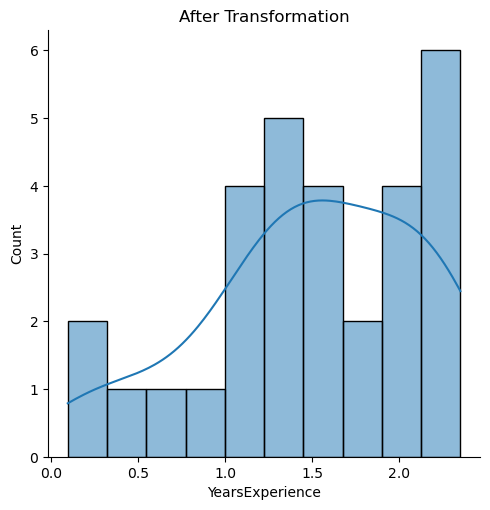

In [55]:
sns.distplot(ds['YearsExperience'], bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(ds['YearsExperience']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

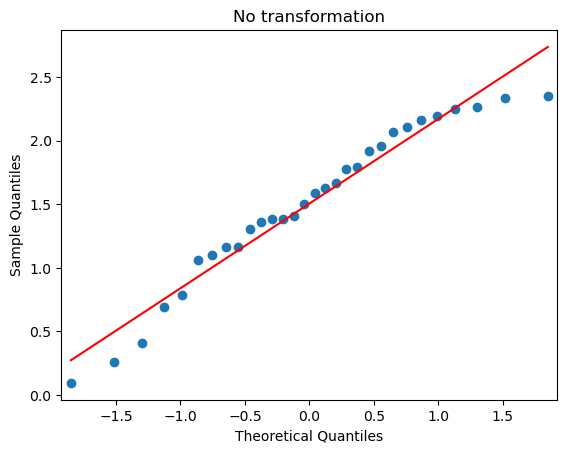

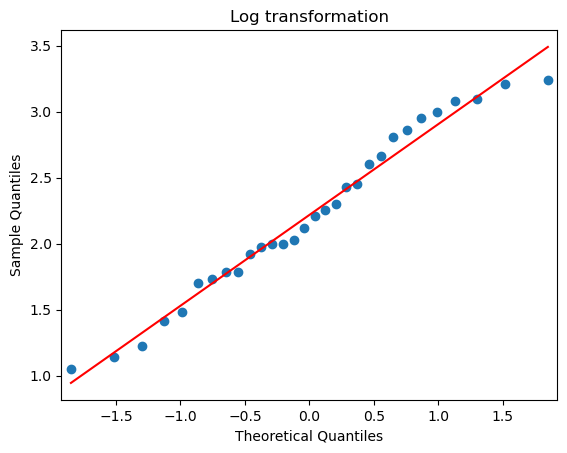

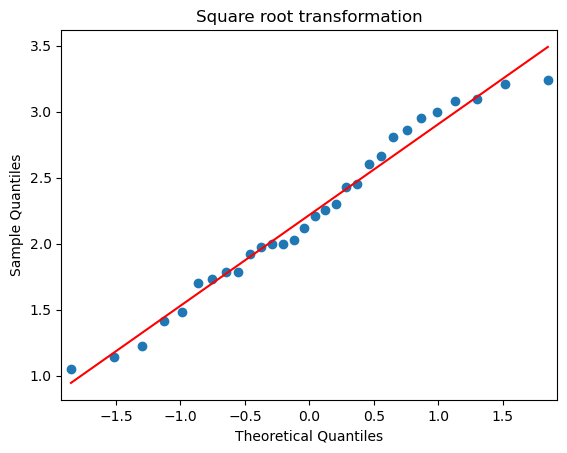

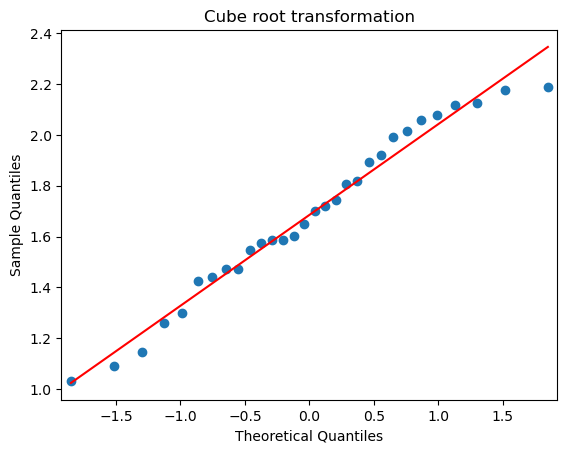

In [56]:
smf.qqplot(np.log(ds['YearsExperience']), line = 'r')
plt.title('No transformation')
smf.qqplot(np.sqrt(ds['YearsExperience']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(ds['YearsExperience']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(ds['YearsExperience']), line = 'r')
plt.title('Cube root transformation')
plt.show()

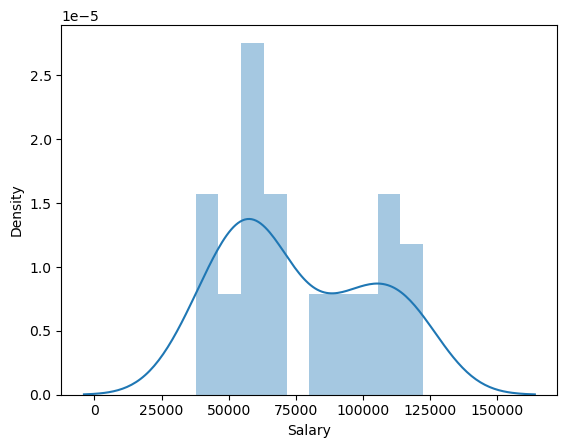

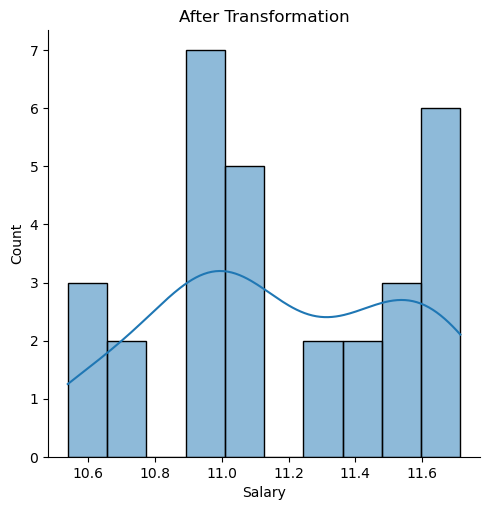

In [57]:
labels = ['Before Transformation','After Transformation']
sns.distplot(ds['Salary'], bins = 10, kde = True)
sns.displot(np.log(ds['Salary']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

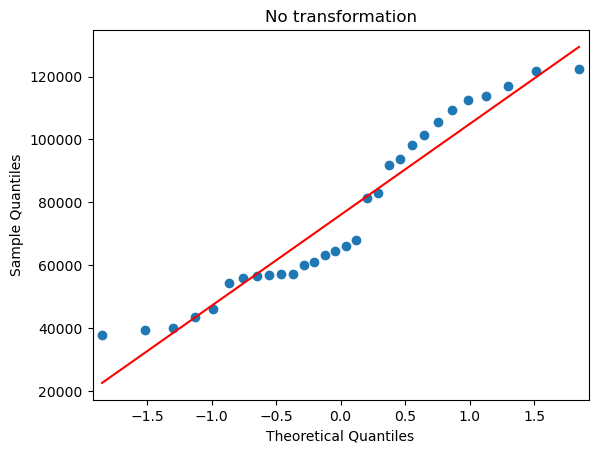

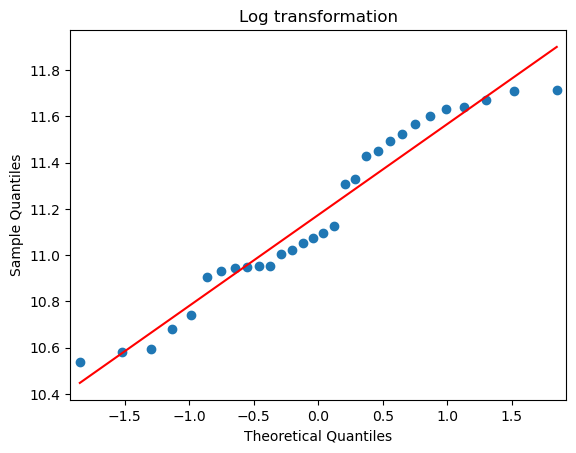

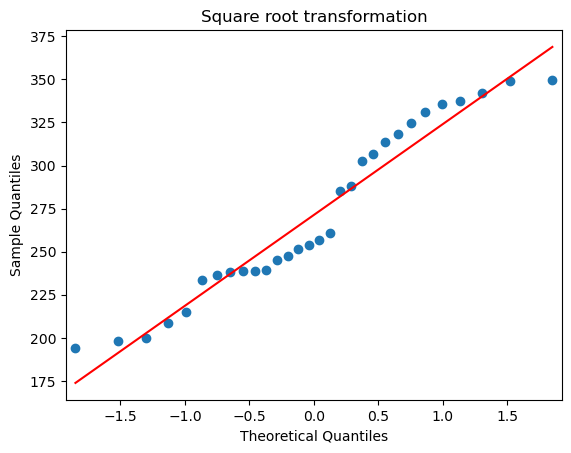

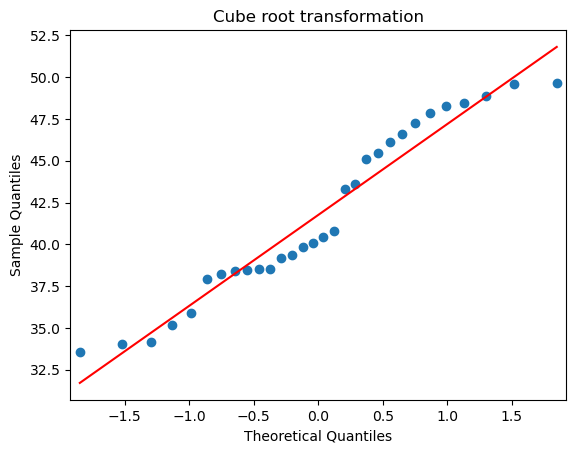

In [58]:
smf.qqplot(ds['Salary'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(ds['Salary']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(ds['Salary']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(ds['Salary']), line = 'r')
plt.title('Cube root transformation')
plt.show()

In [59]:
model = sm.ols('Salary~YearsExperience', data = ds).fit()

In [60]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 14 Jun 2023   Prob (F-statistic):           1.14e-20
Time:                        01:09:12   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
model1 = sm.ols('np.sqrt(Salary)~np.sqrt(YearsExperience)', data = ds).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(Salary)   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Wed, 14 Jun 2023   Prob (F-statistic):           7.58e-19
Time:                        01:09:16   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  103.5680      8.178     12.663      0.000      86.815     120.321
np.sqrt(YearsExperience)    75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
model2 = sm.ols('np.cbrt(Salary)~np.cbrt(YearsExperience)', data = ds).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.cbrt(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     386.5
Date:                Wed, 14 Jun 2023   Prob (F-statistic):           6.37e-18
Time:                        01:09:19   Log-Likelihood:                -50.589
No. Observations:                  30   AIC:                             105.2
Df Residuals:                      28   BIC:                             108.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   16.6603      1.300     12.811      0.000      13.996      19.324
np.cbrt(YearsExperience)    14.8963      0.758     19.659      0.000      13.344      16.448
==============================================================================
Omnibus:                        0.386   Durbin-Watson:                   1.229
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.535
Skew:                           0.070   Prob(JB):                        0.765
Kurtosis:                       2.361   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
model3 = sm.ols('np.log(Salary)~np.log(YearsExperience)', data = ds).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Wed, 14 Jun 2023   Prob (F-statistic):           7.40e-16
Time:                        01:09:22   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  10.3280      0.056    184.868      0.000      10.214      10.442
np.log(YearsExperience)     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [65]:
print(model.tvalues,'\n',model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [66]:
model.rsquared,model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

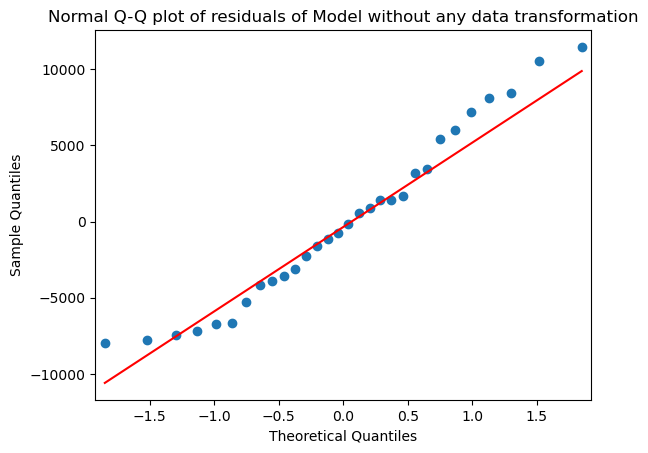

In [67]:
import statsmodels.api as sm
sm.qqplot(model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model without any data transformation')
plt.show()

In [68]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

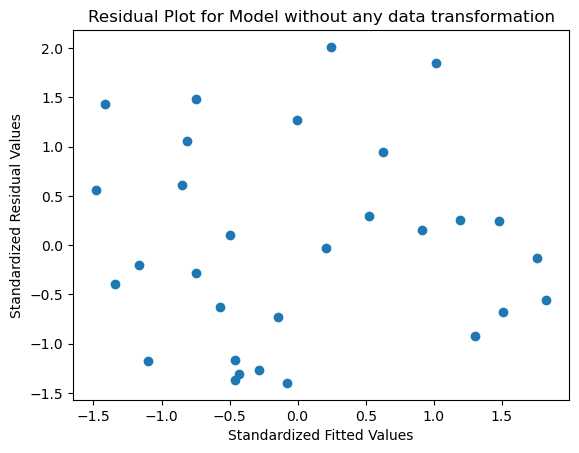

In [69]:
plt.scatter(get_standardized_values(model.fittedvalues), get_standardized_values(model.resid))
plt.title('Residual Plot for Model without any data transformation')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

In [70]:
from sklearn.metrics import mean_squared_error

In [71]:
model1_pred_y =np.square(model1.predict(ds['YearsExperience']))
model2_pred_y =pow(model2.predict(ds['YearsExperience']),3)
model3_pred_y =np.exp(model3.predict(ds['YearsExperience']))

In [72]:
model1_rmse =np.sqrt(mean_squared_error(ds['Salary'], model1_pred_y))
model2_rmse =np.sqrt(mean_squared_error(ds['Salary'], model2_pred_y))
model3_rmse =np.sqrt(mean_squared_error(ds['Salary'], model3_pred_y))
print('model=', np.sqrt(model.mse_resid),'\n' 'model1=', model1_rmse,'\n' 'model2=', model2_rmse,'\n' 'model3=', model3_rmse)

model= 5788.315051119394 
model1= 5960.647096174305 
model2= 6232.815455835858 
model3= 7219.716974372787


In [73]:
rmse = {'model': np.sqrt(model.mse_resid), 'model1': model1_rmse, 'model2': model3_rmse, 'model3' : model3_rmse}
min(rmse, key=rmse.get)

'model'

In [74]:
new_data=pd.Series([3,5])
new_data

0    3
1    5
dtype: int64

In [75]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,3
1,5


In [76]:
model.predict(data_pred)

0    54142.087163
1    73042.011806
dtype: float64